In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates= ['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1) 

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


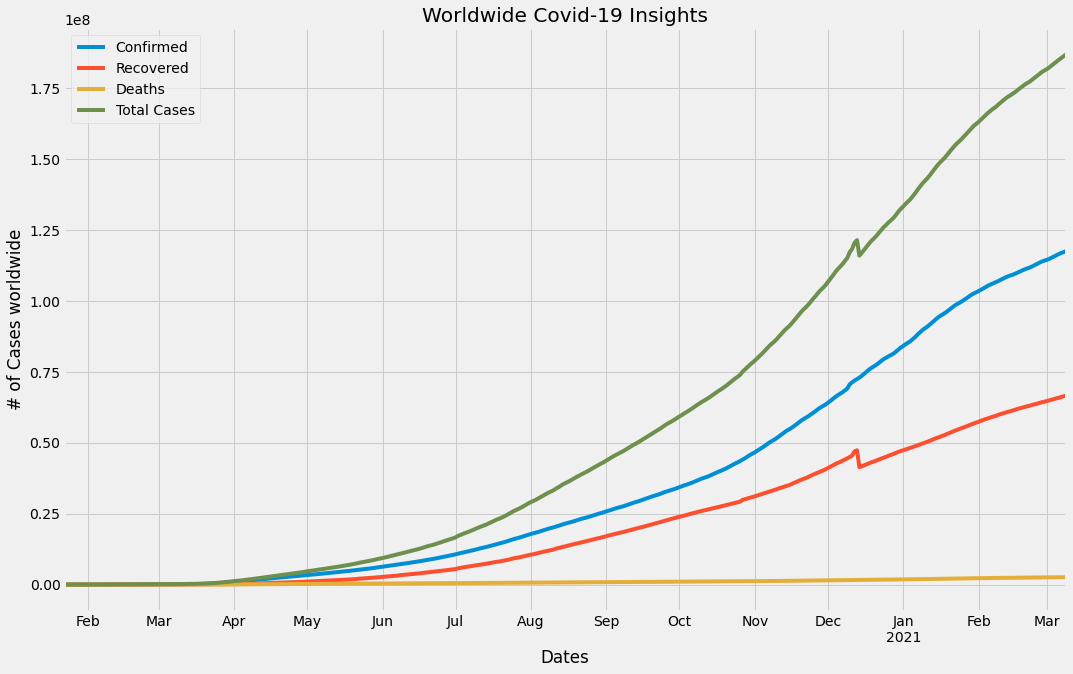

In [7]:
#world=wide cases
worldwide_df = df.groupby(['Date']).sum()
worldwide_df.head()
w = worldwide_df.plot(figsize = (16,10))
w.set_xlabel('Dates')
w.set_ylabel('# of Cases worldwide')
w.title.set_text('Worldwide Covid-19 Insights')
plt.show()

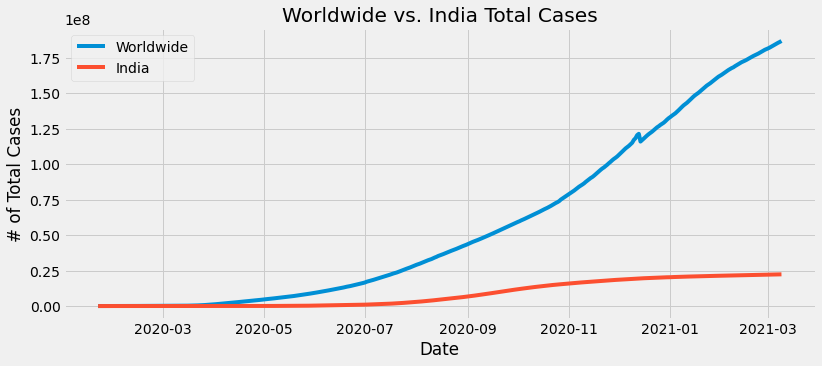

In [9]:
ind_df = df[df['Country'] == 'India'].groupby(['Date']).sum()
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111)
ax.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ax.plot(ind_df[['Total Cases']], label = 'India')
ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('Worldwide vs. India Total Cases')
plt.legend(loc = 'upper left')
plt.show()

In [18]:
#India Daily Cases and Deaths

ind_df['Daily Confirmed'] = ind_df['Confirmed'].sub(ind_df['Confirmed'].shift())
ind_df['Daily Deaths'] = ind_df['Deaths'].sub(ind_df['Deaths'].shift())

fgi = plt.figure(figsize=(20,8))
fig.add_subplot(111)
ax.bar(ind_df['Date'],ind_df['Daily Confirmed'], color = 'b', label = 'India Daily Confirmed Cases')
ax.bar(ind_df['Date'], ind_df['Daily Deaths'], color = 'r', label = 'India Daily Deaths')
plt.show()

<Figure size 1440x576 with 0 Axes>

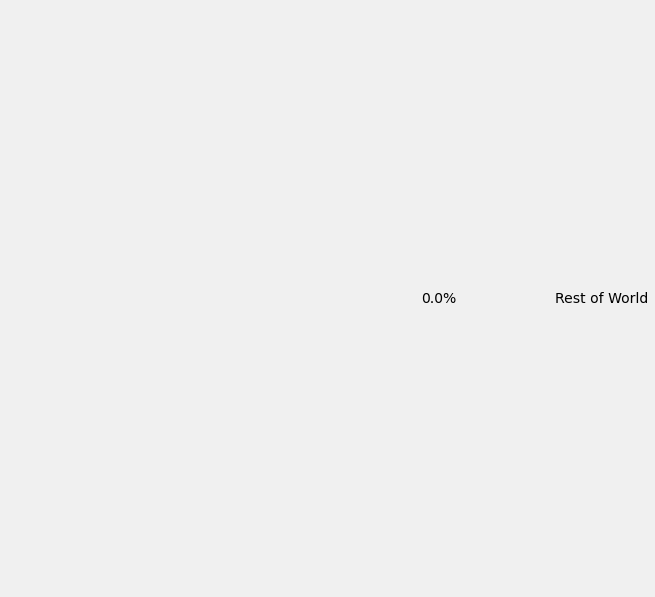

In [20]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')
today_df = df[df['Date'] == yesterday]
top_10 = today_df.sort_values(['Confirmed'],ascending = False)[:10]
top_10.loc['Rest-of-world'] = today_df.sort_values(['Confirmed'],ascending = False)[10:].sum()
top_10.loc['Rest-of-world', 'Country'] = 'Rest of World'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.pie(top_10['Confirmed'], labels = top_10['Country'], autopct = '%1.1f%%')
plt.show()